In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('..\src\projectiveImage.png')

# # Display the image
cv2.imshow('Image', image)

# # Wait for a mouse click
def get_coordinates(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print("Coordinates (x, y):", x, y)

cv2.setMouseCallback('Image', get_coordinates)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [99]:
def AffineRecover(point, l1, l2, l3):
    Hpt = np.array([
        [1, 0,  -l1/l3],
        [0, 1,  -l2/l3],
        [0, 0,  1/l3]
    ]).astype('float32')
    
    Hprime = affinity(lambda1=.5, lambda2=.5) @ np.linalg.inv(Hpt).T

   
    transform_point= Hprime @ np.array(point).T
    if transform_point[2] == 0: transform_point[2] = 1
    transform_point = [transform_point[0]/transform_point[2], transform_point[1]/transform_point[2], 1]
    return transform_point


def affinity(theta=0, phi=0, lambda1=1, lambda2=1, tx=0, ty=0):
    D = np.array([
        [lambda1, 0],
        [0, lambda2]
    ])
    A = R(theta) @ R(-phi) @ D @ R(phi)
    aff_mat = np.array([
        [A[0][0], A[0][1], tx],
        [A[1][0], A[1][1], ty],
        [0,       0,        1]
    ])
    return aff_mat
    
def R(angle):
    angle = np.pi * angle / 180
    R = np.array([
        [np.cos(angle), -1*np.sin(angle)],
        [np.sin(angle), np.cos(angle)]
    ])
    return R

In [100]:
p1=[156,126,1]
p2=[31,75,1]
p3=[30,153,1]
p4=[83,263,1]

l1=np.cross(p1,p2).astype('float32')
l2=np.cross(p3,p4).astype('float32')

l3=np.cross(p1,p4).astype('float32')
l4=np.cross(p2,p3).astype('float32')

point1=np.cross(l1,l2).astype('float32')
point2=np.cross(l3,l4).astype('float32')

L=np.cross(point1,point2).astype('float32')
L[0]=L[0]/L[2]
L[1]=L[1]/L[2]
L[2]=1
print(L)

[ 0.04019566 -0.00569939  1.        ]


(233, 318)
[[134  64  55 ...  32  33  54]
 [134  63  54 ...  32  34  55]
 [135  67  58 ...  35  36  56]
 ...
 [159 100  95 ...  95  94 112]
 [218 198 196 ... 197 197 204]
 [248 246 245 ... 246 246 247]]


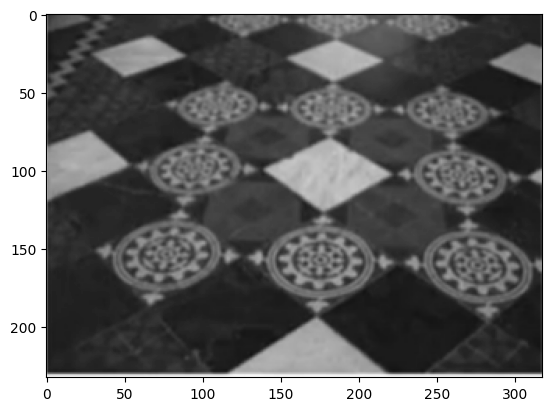

In [101]:
import cv2
im = cv2.imread('..\src\projectiveImage.png', cv2.IMREAD_GRAYSCALE)
print(im.shape)
print(im)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.show()

In [102]:
new_img_type = []
for i in range(233):
    for j in range(318):
        new_point = AffineRecover([i,j,1],L[0],L[1],L[2])
        i_new = int(new_point[0])
        j_new = int(new_point[1])
        new_img_type.append([i_new, j_new, im[i][j]])
new_img_type = np.array(new_img_type)
X, Y, C = zip(*new_img_type)

X -= np.min(X)
Y -= np.min(Y)
C = np.array(C)


sorted_index=np.argsort(X).astype('int')
X=X[sorted_index][:400]
Y=Y[sorted_index][:400]
C=C[sorted_index][:400]

matrix_shape = (np.max(X) + 1, np.max(Y) + 1)
result_matrix = np.zeros(matrix_shape)


result_matrix[X, Y] = C

result_matrix = np.array(result_matrix)
# result_matrix = result_matrix[:300, :300]

plt.imshow(result_matrix, cmap='gray', vmin=0, vmax=255)
plt.show()


[-53901 -11458  -5774  -3580  -3526  -3071  -2652  -2320  -2301  -2003
  -1747  -1569  -1524  -1328  -1155  -1080  -1056  -1001   -989   -905
   -863   -825   -750   -738   -684   -680   -655   -625   -613   -608
   -563   -550   -523   -519   -491   -477   -470   -439   -437   -435
   -429   -408   -401   -398   -381   -379   -366   -361   -350   -343
   -342   -330   -325   -322   -320   -300   -298   -295   -290   -282
   -276   -269   -264   -263   -257   -255   -254   -246   -243   -239
   -236   -234   -228   -224   -220   -218   -214   -211   -209   -207
   -195   -194   -193   -192   -190   -183   -182   -180   -179   -178
   -174   -172   -170   -169   -166   -164   -163   -161   -157   -155
   -154   -152   -150   -149   -147   -145   -144   -140   -139   -138
   -137   -136   -134   -133   -131   -130   -128   -125   -124   -122
   -121   -119   -118   -117   -116   -115   -114   -113   -111   -110
   -109   -108   -107   -106   -105   -104   -103   -102   -101   -100
    -9

MemoryError: Unable to allocate 532. GiB for an array with shape (53870, 1325257) and data type float64